# We Rate Dogs数据清洗 

## 数据收集

In [18]:
import pandas as pd
import numpy as np
import tweepy
import json
import requests
import random
import datetime

下载 image_prediction.tsv 和 twitter_archive_enhanced.csv 文件。

In [ ]:
#下载image_prediction.tsv 文件
img_pred_url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'

r = requests.get(img_pred_url)

with open('image_prediction.tsv', 'wb') as f:
    f.write(r.content)

In [3]:
#下载twitter_archive_enhanced.csv 文件
img_pred_url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/twitter-archive-enhanced.csv'

r = requests.get(img_pred_url)

with open('twitter_archive_enhanced.csv', 'wb') as f:
    f.write(r.content)

将image_prediction.tsv、twitter_archive_enhanced.csv 和 tweet_json.txt 文件读取到DataFrame中。

In [31]:
prediction = pd.read_csv('image_prediction.tsv', sep='\t')

In [32]:
archive = pd.read_csv('twitter_archive_enhanced.csv')

最开始查看tweet_json.txt时，我想到了应该逐行读取，然后逐行存储。不过是用json.load还是json.loads，我还是分不太清楚，直到我看了这个[question](https://stackoverflow.com/questions/39719689/what-is-the-difference-between-json-load-and-json-loads-functions-in-python/39719701)。虽然tweet_json是file，但是我们载入的是每行的str，因此用json.loads。

In [22]:
json_list = []

with open('tweet_json.txt') as json_file:
    for line in json_file.readlines():
        json_list.append(json.loads(line))
        
json_data = pd.DataFrame(json_list)

## 数据评估

In [5]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
archive[archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [8]:
pd.Series(archive.name == 'None').sum()

745

In [9]:
pd.Series(archive.doggo != 'None').sum()+pd.Series(archive.floofer != 'None').sum()+pd.Series(archive.pupper != 'None').sum()+pd.Series(archive.puppo != 'None').sum()

394

In [10]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
archive[archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [12]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1105,722974582966214656,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
1868,844223788422217728,https://pbs.twimg.com/media/C7dJCnqU4AAswat.jpg,1,Labrador_retriever,0.719510,True,Chesapeake_Bay_retriever,0.122019,True,Newfoundland,0.038828,True
1796,831322785565769729,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,1,Old_English_sheepdog,0.999715,True,Tibetan_terrier,0.000046,True,guinea_pig,0.000041,False
667,682962037429899265,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False
1652,809808892968534016,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador_retriever,0.861651,True,golden_retriever,0.044462,True,Staffordshire_bullterrier,0.016497,True
1306,753398408988139520,https://pbs.twimg.com/ext_tw_video_thumb/75339...,1,whippet,0.163794,True,Italian_greyhound,0.157192,True,English_foxhound,0.142995,True
150,668641109086707712,https://pbs.twimg.com/media/CUd9ivxWUAAuXSQ.jpg,1,vacuum,0.432594,False,pug,0.146311,True,toilet_tissue,0.024500,False
1398,768473857036525572,https://pbs.twimg.com/media/Cqoq5PGWAAA-U8T.jpg,1,Labrador_retriever,0.739170,True,Chesapeake_Bay_retriever,0.246488,True,kelpie,0.006892,True
1431,773247561583001600,https://pbs.twimg.com/media/Crsgi9dWEAApQd8.jpg,1,seat_belt,0.713588,False,miniature_pinscher,0.083369,True,Brabancon_griffon,0.075696,True
1739,822462944365645825,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,3,Pomeranian,0.960199,True,Samoyed,0.023056,True,Maltese_dog,0.008945,True


In [15]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [5]:
if_belong = prediction.tweet_id.isin(archive.tweet_id)
False in if_belong.values

False

In [16]:
prediction.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [17]:
prediction.p2_conf.describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [18]:
prediction.p3_conf.describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [24]:
json_data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,39492,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,33786,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,25445,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,42863,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,41016,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."


In [25]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [33]:
if_belong = json_data.id.isin(archive.tweet_id)
False in if_belong.values

False

In [21]:
json_data.retweet_count.describe()

count     2352.000000
mean      3134.932398
std       5237.846296
min          0.000000
25%        618.000000
50%       1456.500000
75%       3628.750000
max      79116.000000
Name: retweet_count, dtype: float64

In [102]:
json_data.retweet_count.mode()

0     312
1     745
2    1280
dtype: int64

In [9]:
json_data.favorite_count.describe()

count      2352.000000
mean       8109.198980
std       11980.795669
min           0.000000
25%        1417.000000
50%        3596.500000
75%       10118.000000
max      132318.000000
Name: favorite_count, dtype: float64

In [103]:
json_data.favorite_count.mode()

0    0
dtype: int64

### 质量  
#### archive表格：  
- tweet_id类型应为str。  
- in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp类型不对。
- in_reply_to_status_id、in_reply_to_user_id、expanded_urls及转发的信息缺省。***（无法更改，转发信息也无需更改）***  
- timestamp的命名与json不统一，且类型错误。 
- name有的条目提取错误，且有缺省值，但类型不是np.nan。
- doggo、floofer、pupper、puppo有缺省值，但类型不是np.nan。
- doggo、floofer、pupper、puppo应综合为一列。
- doggo、floofer、pupper、puppo有的条目并列存在。
- text的文本模板有的没有统一。***（无法更改）***  
- rating_numerator存在异常值。
- rating_denominator通常应为10，但是有23条记录不是。



#### prediction表格：
- 缺少记录。***(无法补充)***
- tweet_id类型应为str。  
- 应补充‘kind’列，且类型为‘category’。然后依据tweet_id加入archive表格中。因为我们只需要含有图片的原始评级，因此只保留prediction和archive中都包含的tweet_id的条目。



#### json表格：
- 缺少记录。***(无法补充)***
- created_at类型错误。
- id_str应更名为tweet_id，和archive、prediction表格保持一致。
- full_text更名为text，与archive保持一致。
- 将favorite_count和retweet_count加入archive表格中，类型为int即可


## 清理

In [48]:
archive_clean = archive.copy()
prediction_clean = prediction.copy()
json_clean = json_data.copy()

因为我们分析的是原始数据，即不包含转发的数据，因此在archive的retweeted记录不为空（转发条目）的都要删除。

In [49]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

### 缺失  

#### `archive`:
- name有的条目提取错误，且有缺省值，但类型不是np.nan，因此无法用isnull()判断。  
用str.extract()和正则表达式重新提取name。需要注意的是，text中介绍狗狗的名字有很多种格式。  

在正则表达式中，“?:”表示[不捕获分组](https://stackoverflow.com/questions/10793504/what-does-mean-in-a-python-regular-expression)，这样就免去了再截取字符串的麻烦。

In [50]:
archive_clean.name = archive_clean.text.str.extract('(?:This is|Meet|name is|Say hello to|named) ([A-Z][a-z]{1,12})', expand=False)

In [51]:
pd.Series(archive_clean.name.isnull()).sum()

759

##### 测试：

In [52]:
archive_clean.name.sample(10)

1471         NaN
205        Benny
8           Zoey
2300        Keet
1732         NaN
1735      Hunter
114         Cody
1137     Raymond
65        Bailey
1347    Bisquick
Name: name, dtype: object

#### `archive`:

- doggo、floofer、pupper、puppo有缺省值，但类型不是np.nan。
- doggo、floofer、pupper、puppo应综合为一列。
- doggo、floofer、pupper、puppo有的条目并列存在。  

直接删除这四列，然后重新提取并综合为一列，命名为stage。对于有多种地位的狗狗，使用“,”连接。

In [53]:
archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)
archive_clean['stage'] = archive_clean.text.str.findall('(doggo|floof|pupper|puppo)')

def cor_stage(stage):
    if stage == []:
        return np.nan
    elif len(stage) == 1:
        return stage[0]
    elif len(stage) >1:
        return ','.join(stage)
    
archive_clean.stage = archive_clean.stage.apply(cor_stage)

##### 测试：

In [15]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1416 non-null object
stage                         383 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 334.9+ KB


In [17]:
archive_clean.stage.describe()

count        383
unique        11
top       pupper
freq         234
Name: stage, dtype: object

### 清洁度  

#### `archive` and `prediction`:
- tweet_id类型应为str。
- 应在prediction_clean中补充‘kind’列，且‘kind’的类型应为category。然后依据tweet_id，在archive_clean表格中补充‘kind’。因为我们只需要含有图片的原始评级，因此只保留prediction和archive中都包含的tweet_id的条目。


In [54]:
archive_clean.tweet_id = archive_clean.tweet_id.astype('str')
prediction_clean.tweet_id = prediction_clean.tweet_id.astype('str')

In [55]:
def extract_kind(dog):
    if dog['p1_dog']:
        return dog['p1']
    elif dog['p2_dog']:
        return dog['p2']
    elif dog['p3_dog']:
        return dog['p3']
    else:
        return np.nan
        
prediction_clean['kind'] = prediction_clean.apply(extract_kind, axis=1)
prediction_clean['kind'] = prediction_clean['kind'].astype('category')

prediction_kind = prediction_clean[['tweet_id','kind']]

archive_clean = pd.merge(archive_clean, prediction_kind, on='tweet_id', how='inner')

##### 测试：

In [20]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 15 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1373 non-null object
stage                         345 non-null object
kind                          1686 non-null category
dtypes: category(1), float64(4), int64(2), object(8)
memory usage: 241.5+ KB


In [21]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,kind
1766,670403879788544000,NaN,NaN,2015-11-28 00:48:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nigel. He accidentally popped his ball...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670403879...,10,10,Nigel,NaN,pug
1084,700796979434098688,NaN,NaN,2016-02-19 21:39:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daniel. He's a neat pup. Exotic af. Cu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700796979...,7,10,Daniel,NaN,NaN
1635,672640509974827008,NaN,NaN,2015-12-04 04:56:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leonidas. He just got rekt by a snowba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672640509...,9,10,Leonidas,NaN,Chesapeake_Bay_retriever
1336,682393905736888321,NaN,NaN,2015-12-31 02:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreg. He's riding an invisible jet ski...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682393905...,11,10,Kreg,NaN,vizsla
1751,670465786746662913,NaN,NaN,2015-11-28 04:54:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Silly dog here. Wearing bunny ears. Nice long ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670465786...,7,10,NaN,NaN,NaN


#### `json`:  

- id_str更名为tweet_id，和archive、prediction表格保持一致。
- full_text更名为text，与archive保持一致。

In [56]:
json_clean.rename(columns={'id_str':'tweet_id'}, inplace=True)
json_clean.rename(columns={'full_text':'text'}, inplace=True)

##### 测试：

In [23]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
text                             2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
tweet_id                         2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

#### `json`:

- 将favorite_count和retweet_count加入archive表格中。

In [57]:
json_extract = json_clean[['tweet_id','favorite_count','retweet_count','created_at']]

archive_clean = pd.merge(json_extract, archive_clean, on='tweet_id', how='right')

虽然json表格中的确实条目无法进行补充，但是favorite_count和retweet_count还是可以选用众值进行填充。

In [58]:
archive_clean.favorite_count = archive_clean.favorite_count.fillna(random.choice(archive_clean.favorite_count.mode()))
archive_clean.retweet_count = archive_clean.retweet_count.fillna(random.choice(archive_clean.retweet_count.mode()))

archive_clean.favorite_count = archive_clean.favorite_count.astype('int')
archive_clean.retweet_count = archive_clean.retweet_count.astype('int')

将created_at类型更改为timestamp。

In [84]:
archive_clean.created_at = pd.to_datetime(archive_clean.created_at)

##### 测试：

In [85]:
archive_clean.sample(5)

,tweet_id,favorite_count,retweet_count,created_at,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,kind
305,823699002998870016,13786,2764,2017-01-24 01:08:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. The goggles make him a superh...,https://twitter.com/dog_rates/status/823699002...,12,10,Winston,NaN,cairn
167,850753642995093505,33213,10285,2017-04-08 16:54:09,"<a href=""http://twitter.com/download/iphone"" r...","This is Kyle. He made a joke about your shoes,...",https://twitter.com/dog_rates/status/850753642...,11,10,Kyle,NaN,pug
1095,699413908797464576,2250,687,2016-02-16 02:04:04,"<a href=""http://twitter.com/download/iphone"" r...",Meet Miley. She's a Scandinavian Hollabackgirl...,https://twitter.com/dog_rates/status/699413908...,11,10,Miley,NaN,Samoyed
1801,669328503091937280,1074,450,2015-11-25 01:35:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Kirk. He just saw a bacon wrapped tenn...,https://twitter.com/dog_rates/status/669328503...,12,10,Kirk,NaN,Siberian_husky
381,811744202451197953,8390,1873,2016-12-22 01:24:33,"<a href=""http://twitter.com/download/iphone"" r...",This is Halo. She likes watermelon. 13/10 http...,https://twitter.com/dog_rates/status/811744202...,13,10,Halo,NaN,Pekinese


In [61]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 18 columns):
tweet_id                      1994 non-null object
favorite_count                1994 non-null int32
retweet_count                 1994 non-null int32
created_at                    1994 non-null datetime64[ns]
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1373 non-null object
stage                         345 non-null object
kind                          16

### 质量  

#### `archive`:
- in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp类型不对。
- timestamp的命名与json不统一，且类型错误。  

考虑到进行分析时，这几项特征用处不大，且部分特征缺省值很多，因此直接删除。

In [62]:
archive_clean = archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','timestamp','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

##### 测试：

In [29]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 11 columns):
tweet_id              1994 non-null object
favorite_count        1994 non-null int32
retweet_count         1994 non-null int32
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1373 non-null object
stage                 345 non-null object
kind                  1686 non-null category
dtypes: category(1), int32(2), int64(2), object(6)
memory usage: 163.6+ KB


#### `archive`:   
- rating_numerator存在异常值。
- rating_denominator通常应为10，但是有23条记录不是。

In [63]:
# 初步提取rating
archive_clean.rating_numerator = archive_clean.text.str.extract('([0-9]{1,3}/10)').str.split('/').str[0]
archive_clean.rating_denominator = archive_clean.text.str.extract('([0-9]{1,3}/10)').str.split('/').str[1]

C:\Users\praguexue\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
C:\Users\praguexue\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
#按照是否正确提取rating_denominator，将archive表分别进行分析
archive_error = archive_clean[archive_clean.rating_denominator != '10']
archive_right = archive_clean[archive_clean.rating_denominator == '10']

# 将正确提取的rating转换成int类型
archive_right.rating_numerator = archive_right.rating_numerator.astype(int)
archive_right.rating_denominator = archive_right.rating_denominator.astype(int)

C:\Users\praguexue\Anaconda2\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [65]:
# 检查是否还会有异常值
archive_right[archive_right.rating_numerator > 15]

,tweet_id,favorite_count,retweet_count,created_at,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,kind
503,786709082849828864,20221,7033,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,NaN,Pomeranian
553,778027034220126208,7292,1867,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,NaN,clumber
726,749981277374128128,5594,2769,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,776,10,Atticus,NaN,NaN
1374,680494726643068929,1868,542,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,NaN,pupper,kuvasz
1718,670842764863651840,25673,9509,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,NaN,NaN,NaN


这几个值为rating_denominator正确提取后，rating_numerator依旧异常的条目，在进行了逐个查看后，部分条目(503 553 1374)的评分是小数(进行四舍五入处理)；其他几条(726 1718)的评分则有点太夸张，因此考虑用众值进行填充。

In [66]:
#查看异常值的text
archive_clean.iloc[1374].text

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [67]:
# 修正评分
archive_right.loc[503,'rating_numerator'] = 10
archive_right.loc[553,'rating_numerator'] = 11
archive_right.loc[1374,'rating_numerator'] = 11

C:\Users\praguexue\Anaconda2\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [68]:
# 查看众值
archive_right.rating_numerator.mode()

0    12
dtype: int32

In [69]:
#用众值--12来填充剩余的异常值。
archive_right.loc[726,'rating_numerator'] = 12
archive_right.loc[1718,'rating_numerator'] = 12

In [70]:
archive_error.rating_numerator = archive_error.text.str.extract('([0-9]{1,3}/[1-9][0-9]{1,2})').str.split('/').str[0]
archive_error.rating_denominator = archive_error.text.str.extract('([0-9]{1,3}/[1-9][0-9]{1,2})').str.split('/').str[1]

C:\Users\praguexue\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
C:\Users\praguexue\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [71]:
# 查看未正确提取rating_denominator的条目
archive_error

,tweet_id,favorite_count,retweet_count,created_at,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,kind
323,820690176645140481,13476,3699,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,"floof,floof",West_Highland_white_terrier
385,810984652412424192,5904,1647,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",NaN,NaN,Sam,NaN,golden_retriever
662,758467244762497024,5297,2516,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,NaN,Labrador_retriever
848,731156023742988288,4172,1427,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,NaN,doggo,NaN
946,713900603437621249,3049,827,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,NaN,pupper,golden_retriever
970,710658690886586372,2513,633,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,NaN,pupper,soft-coated_wheaten_terrier
988,709198395643068416,2623,716,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,NaN,NaN,borzoi
1054,704054845121142784,3193,1023,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,NaN,pupper,Great_Pyrenees
1130,697463031882764288,3730,1547,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44,40,NaN,NaN,Labrador_retriever
1302,684225744407494656,1361,239,2016-01-05 04:11:44,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,143,130,NaN,pupper,golden_retriever


可以看出，大部分的评价可能是总体评分（rating_denominator可以被10整除），第385条中确实没有正确的评分信息，因此考虑用众数填充。

In [72]:
# 查看无法取值的text
archive_clean.iloc[385].text

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [73]:
# 用众值填充
archive_error.loc[385,'rating_numerator'] = 12
archive_error.loc[385,'rating_denominator'] = 10

# 得到每组条目中各自的分数
archive_error.rating_numerator = archive_error.rating_numerator.astype(int)
archive_error.rating_denominator = archive_error.rating_denominator.astype(int)
archive_error.rating_numerator = archive_error.rating_numerator/(archive_error.rating_denominator/10).astype(int)
archive_error.rating_denominator = 10
archive_error.rating_numerator = archive_error.rating_numerator.astype(int)

In [74]:
archive_clean = pd.concat([archive_right, archive_error], ignore_index='True')

##### 测试：

In [42]:
archive_clean.rating_numerator.describe()

count    1994.000000
mean       10.556670
std         2.177301
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

In [43]:
archive_clean.rating_denominator.describe()

count    1994.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

In [82]:
archive_clean.sample(5)

,tweet_id,favorite_count,retweet_count,created_at,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,kind
1571,673906403526995968,3387,1791,2015-12-07 16:46:21,"<a href=""http://twitter.com/download/iphone"" r...",Guys I'm getting real tired of this. We only r...,https://twitter.com/dog_rates/status/673906403...,3,10,NaN,NaN,soft-coated_wheaten_terrier
911,718246886998687744,2097,561,2016-04-08 01:19:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexanderson. He's got a weird ass bir...,https://twitter.com/dog_rates/status/718246886...,3,10,Alexanderson,NaN,Chihuahua
933,714982300363173890,4076,1162,2016-03-30 01:07:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Calbert. He forgot to clear his Google...,https://twitter.com/dog_rates/status/714982300...,9,10,Calbert,NaN,Brittany_spaniel
1742,670442337873600512,689,211,2015-11-28 03:21:24,"<a href=""http://twitter.com/download/iphone"" r...",Meet Koda. He's large. Looks very soft. Great ...,https://twitter.com/dog_rates/status/670442337...,11,10,Koda,NaN,Sussex_spaniel
91,870804317367881728,33689,6348,2017-06-03 00:48:22,"<a href=""http://twitter.com/download/iphone"" r...",Real funny guys. Sending in a pic without a do...,https://twitter.com/dog_rates/status/870804317...,11,10,NaN,NaN,NaN


## 保存主数据集

In [75]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)

## 可视化分析   

导入所需的库

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\praguexue\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [76]:
archive_clean = pd.read_csv('twitter_archive_master.csv')

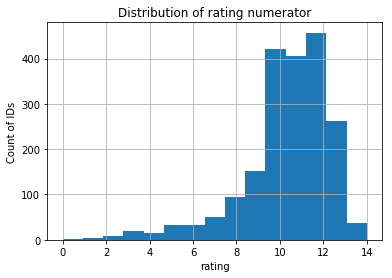

In [77]:
# 首先查看rating_numerator的分布。
archive_clean.rating_numerator.hist(bins=15)

plt.title('Distribution of rating numerator')
plt.xlabel('rating')
plt.ylabel('Count of IDs')

评分为9-14的占大多数。看来大家都很喜欢图片中的狗狗，甚至比要求的最高分10分还要多出几分。

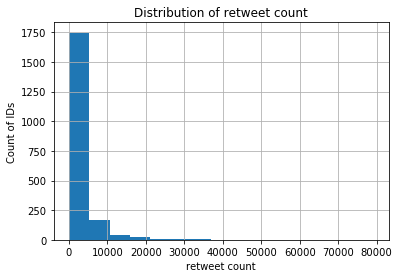

In [5]:
# 再来查看retweet_count的分布。
archive_clean.retweet_count.hist(bins=15)

plt.title('Distribution of retweet count')
plt.xlabel('retweet count')
plt.ylabel('Count of IDs')

大多数是在5000次之内，基本在20000次之内。

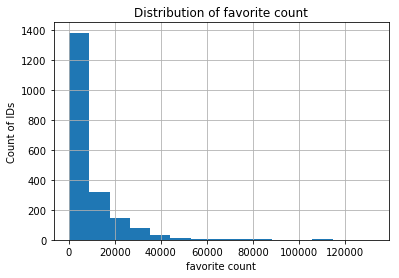

In [6]:
# 再来查看favorite_count的分布。
archive_clean.favorite_count.hist(bins=15)

plt.title('Distribution of favorite count')
plt.xlabel('favorite count')
plt.ylabel('Count of IDs')

点赞数基本在20000个之内，基本在40000次之内

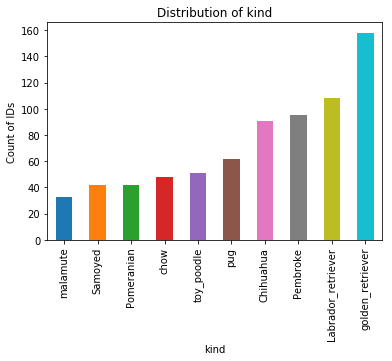

In [52]:
# 由于狗狗的品种太多了，因此只画出前十位的狗狗品种的排名。
grouped_archive = archive_clean.groupby('kind').size()

grouped_archive.sort_values()[-10:].plot(kind='bar', title='Distribution of kind')
plt.ylabel('Count of IDs')

看来金毛和拉布拉多果然是大家最喜欢养的狗狗。其次是柯基和吉娃娃。  
下面针对数量遥遥领先的金毛犬，来进行一些分析。

In [53]:
golden = archive_clean[archive_clean.kind=='golden_retriever']

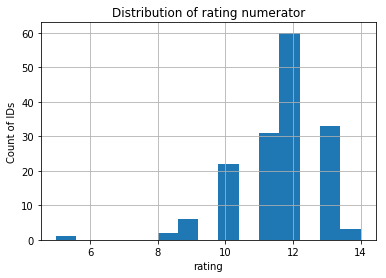

In [54]:
#查看金毛的得分分布。
golden.rating_numerator.hist(bins=15)

plt.title('Distribution of rating numerator')
plt.xlabel('rating')
plt.ylabel('Count of IDs')

分布和总体分布趋势是差不多的。

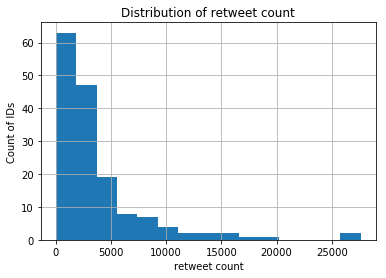

In [55]:
# 再来查看金毛的转载数量分布 和 点赞数量分布
golden.retweet_count.hist(bins=15)

plt.title('Distribution of retweet count')
plt.xlabel('retweet count')
plt.ylabel('Count of IDs')

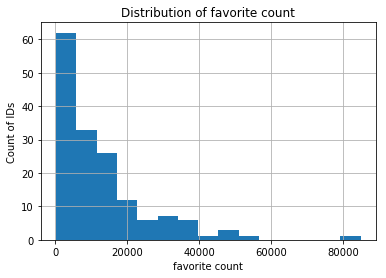

In [56]:
golden.favorite_count.hist(bins=15)

plt.title('Distribution of favorite count')
plt.xlabel('favorite count')
plt.ylabel('Count of IDs')

看来可爱的金毛对转载数和点赞数做了不小的贡献。  

下面来大家最喜欢怎样形容狗狗。

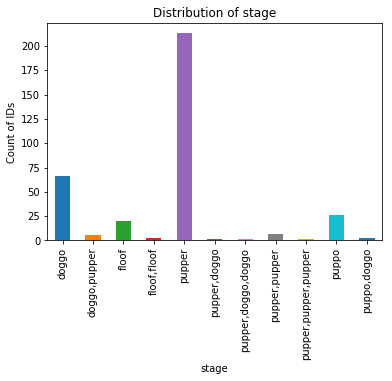

In [7]:
grouped_archive = archive_clean.groupby('stage').size()

grouped_archive.plot(kind='bar', title='Distribution of stage')
plt.ylabel('Count of IDs')

最受欢迎的词是pupper，其次是doggo，也有很多狗狗同时拥有不同的评价地位。  

最后来看大家喜欢给狗狗起什么名字，由于狗狗的名字太多了，我们还是选取数量最多的前十位。

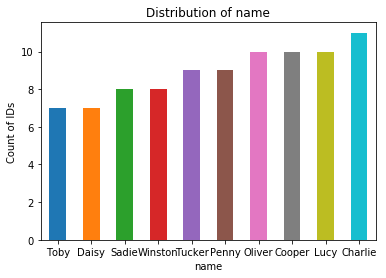

In [8]:
grouped_archive = archive_clean.groupby('name').size()

grouped_archive.sort_values()[-10:].plot(kind='bar', title='Distribution of name', rot=0)
plt.ylabel('Count of IDs')

都是耳熟能详的一些名字，而且感觉从名字来看，公狗狗数量比较多。

In [86]:
type(archive_clean.created_at[0])

pandas._libs.tslib.Timestamp

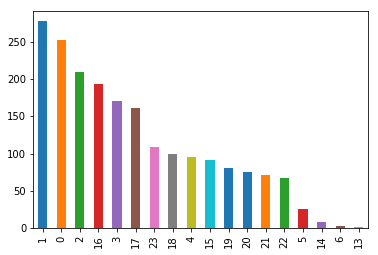

In [88]:
archive_clean['hour'] = archive_clean.created_at.apply(lambda x:x.hour)
archive_clean.hour.value_counts().plot(kind='bar')

推文的创建时间基本在0-3点和16-17点这么两个区间，感觉是一个夜猫子账号。 是否因为这个时间创建的推文会收到更多的点赞呢？  
可以先提取出点赞TOP10%的条目。

In [90]:
fav_top10 = archive_clean[archive_clean.favorite_count > archive_clean.favorite_count.quantile(0.1)]

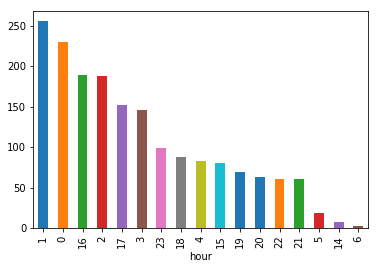

In [93]:
fav_top10_hour = fav_top10.groupby('hour').size().sort_values(ascending = False)
fav_top10_hour.plot(kind='bar')

看来确实是为了点赞“牺牲”了早睡。  
在来查看下，点赞和狗狗的品种有没有关系。

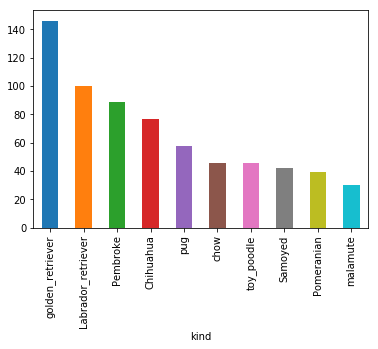

In [95]:
fav_top10_kind = fav_top10.groupby('kind').size().sort_values(ascending = False)
fav_top10_kind[:10].plot(kind='bar')

由于狗子的种类太多，还是只看排名最高的前10种。虽然不排除基数大的原因，但其实我们也可以认为，也正是因为这些种类的狗子受欢迎，养的人才多。  
看来如果这一篇狗狗评分的推文在0-2点发出，并且种类为金毛、拉布拉多或者柯基，那么就可以坐收点赞了。

最后对大家所发的推文生成词云。

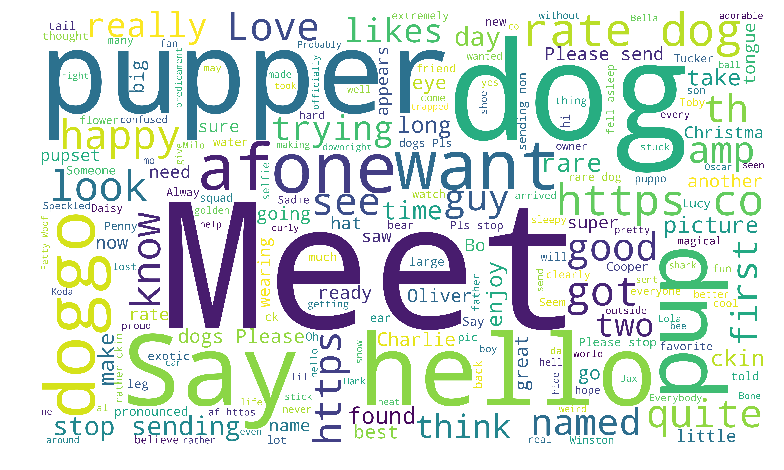

In [36]:
from wordcloud import WordCloud

text = archive_clean.text.to_string(header=False, index=False )
wordcloud = WordCloud(background_color='white',width=5000, height=3000, margin=2).generate(text)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

通过对于狗狗的评分、点赞数、转载数量我们可以看出人们的对于狗狗们的喜爱程度是很高的，可以说不亚于微博网红。尤其如果这只狗狗是金毛或者拉布拉多、那一定是吸睛重点。  

并且从上面的词云可以看出，大家对于自己狗狗的喜爱程度相当高，例如MEET,SAY HELLO,LOVE,GUY，基本就是把自己的狗狗当成自己的孩子一样介绍给大家。所以既然我们有朋友圈，妈妈圈，为什么不能有个狗狗圈？  